### Proyecto final deep

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [224]:
data = pd.read_csv('./data/data.csv')

In [225]:
data.head(5)

num_corre  ano_ocu  dia_ocu  hora_ocu  g_hora  g_hora_5  mes_ocu  \
0          1     2017        1         1       1         1        1   
1          2     2017        1         1       1         1        1   
2          3     2017        1         2       1         1        1   
3          4     2017        1        10       2         1        1   
4          5     2017        1        10       2         1        1   

   dia_sem_ocu  mupio_ocu  depto_ocu  ...  g_edad_60ymas  edad_quinquenales  \
0            7        101          1  ...              6                  8   
1            7        101          1  ...              6                  8   
2            7        110          1  ...              3                  5   
3            7        504          5  ...              3                  5   
4            7        504          5  ...              4                  6   

   estado_con  mayor_menor  tipo_veh  marca_veh  color_veh  modelo_veh  \
0           1            1        12          7          7        1971   
1           2            1         1         28          2        9999   
2           2            1         4         18          1        9999   
3           9            1        14          6          1        2014   
4           9            1         1         69          4        1992   

   g_modelo_veh  tipo_eve  
0             1         1  
1             6         1  
2             6         2  
3             5         1  
4             3         1  

[5 rows x 24 columns]

In [226]:
data.describe()

num_corre       ano_ocu       dia_ocu      hora_ocu        g_hora  \
count  39088.000000  39088.000000  39088.000000  39088.000000  39088.000000   
mean    4919.266245   2018.572784     15.718814     13.641424      2.866353   
std     2876.618165      1.097248      8.816009      6.637545      1.060937   
min        1.000000   2017.000000      1.000000      0.000000      1.000000   
25%     2443.750000   2018.000000      8.000000      9.000000      2.000000   
50%     4886.500000   2019.000000     16.000000     15.000000      3.000000   
75%     7329.250000   2020.000000     23.000000     19.000000      4.000000   
max    10827.000000   2020.000000     31.000000     23.000000      4.000000   

           g_hora_5       mes_ocu   dia_sem_ocu     mupio_ocu     depto_ocu  \
count  39088.000000  39088.000000  39088.000000  39088.000000  39088.000000   
mean       2.010003      6.573961      4.287684    709.373926      7.037275   
std        0.844030      3.570739      2.047558    694.065688      6.941449   
min        1.000000      1.000000      1.000000    101.000000      1.000000   
25%        1.000000      3.000000      2.000000    106.000000      1.000000   
50%        2.000000      7.000000      5.000000    412.000000      4.000000   
75%        3.000000     10.000000      6.000000   1301.000000     13.000000   
max        3.000000     12.000000      7.000000   2217.000000     22.000000   

       ...  g_edad_60ymas  edad_quinquenales    estado_con   mayor_menor  \
count  ...   39088.000000       39088.000000  39088.000000  39088.000000   
mean   ...       6.577287           9.445559      5.770595      2.019904   
std    ...       3.493491           4.923453      3.856238      2.635430   
min    ...       1.000000           1.000000      1.000000      1.000000   
25%    ...       4.000000           6.000000      1.000000      1.000000   
50%    ...       5.000000           7.000000      9.000000      1.000000   
75%    ...      10.000000          12.000000      9.000000      1.000000   
max    ...      16.000000          18.000000      9.000000      9.000000   

           tipo_veh     marca_veh     color_veh    modelo_veh  g_modelo_veh  \
count  39088.000000  39088.000000  39088.000000  39088.000000  39088.000000   
mean       9.042750    303.606708     27.173711   7328.940570     53.950292   
std       21.813033    426.269658     40.943992   3769.647667     47.089783   
min        1.000000      1.000000      1.000000   1897.000000      1.000000   
25%        2.000000     27.000000      2.000000   2016.000000      5.000000   
50%        4.000000     67.000000      5.000000   9999.000000     99.000000   
75%        4.000000    999.000000     14.000000   9999.000000     99.000000   
max       99.000000    999.000000     99.000000   9999.000000     99.000000   

           tipo_eve  
count  39088.000000  
mean       2.108320  
std        1.944541  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        3.000000  
max       99.000000  

[8 rows x 24 columns]

In [227]:
data.shape

(39088, 24)

In [228]:
data.dtypes

num_corre            int64
ano_ocu              int64
dia_ocu              int64
hora_ocu             int64
g_hora               int64
g_hora_5             int64
mes_ocu              int64
dia_sem_ocu          int64
mupio_ocu            int64
depto_ocu            int64
zona_ocu             int64
sexo_per             int64
edad_per             int64
g_edad_80ymas        int64
g_edad_60ymas        int64
edad_quinquenales    int64
estado_con           int64
mayor_menor          int64
tipo_veh             int64
marca_veh            int64
color_veh            int64
modelo_veh           int64
g_modelo_veh         int64
tipo_eve             int64
dtype: object

In [229]:
print(data.isnull().sum())

num_corre            0
ano_ocu              0
dia_ocu              0
hora_ocu             0
g_hora               0
g_hora_5             0
mes_ocu              0
dia_sem_ocu          0
mupio_ocu            0
depto_ocu            0
zona_ocu             0
sexo_per             0
edad_per             0
g_edad_80ymas        0
g_edad_60ymas        0
edad_quinquenales    0
estado_con           0
mayor_menor          0
tipo_veh             0
marca_veh            0
color_veh            0
modelo_veh           0
g_modelo_veh         0
tipo_eve             0
dtype: int64


In [230]:
print(data.nunique())

num_corre            10827
ano_ocu                  4
dia_ocu                 31
hora_ocu                24
g_hora                   4
g_hora_5                 3
mes_ocu                 12
dia_sem_ocu              7
mupio_ocu              335
depto_ocu               22
zona_ocu                23
sexo_per                 3
edad_per                88
g_edad_80ymas           16
g_edad_60ymas           13
edad_quinquenales       18
estado_con               3
mayor_menor              3
tipo_veh                20
marca_veh              145
color_veh               17
modelo_veh              59
g_modelo_veh             7
tipo_eve                 9
dtype: int64


### Clases uncias en tipo de vehiculo

In [234]:
unique_classes = data['tipo_veh'].unique()
print("Clases únicas en la columna 'tipo_veh':")
unique_classes.sort()
print(unique_classes)

Clases únicas en la columna 'tipo_veh':
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 22 23 99]


#### Tratamiento de valores 99 y 999

In [235]:
data["hora_ocu"] = data["hora_ocu"].replace(to_replace=99, value=25)
data["zona_ocu"] = data["zona_ocu"].replace(to_replace=99, value=26)
data["color_veh"] = data["color_veh"].replace(to_replace=99, value=18)
data["g_modelo_veh"] = data["g_modelo_veh"].replace(to_replace=99, value=6)
data["tipo_eve"] = data["tipo_eve"].replace(to_replace=99, value=9)

### EDA

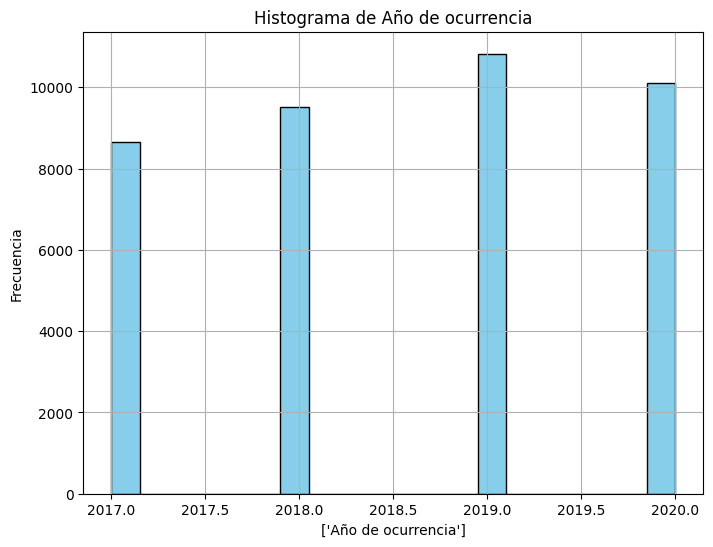

In [81]:

plt.figure(figsize=(8, 6))
plt.hist(data["ano_ocu"], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de {"Año de ocurrencia"}')
plt.xlabel(['Año de ocurrencia'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

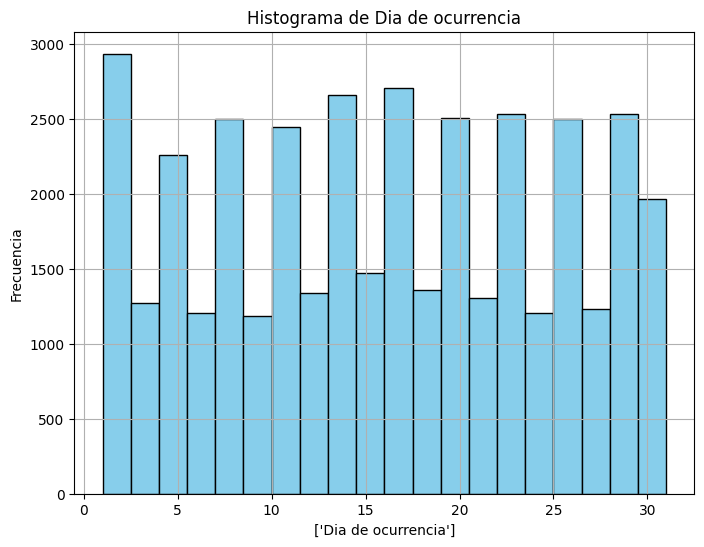

In [82]:

plt.figure(figsize=(8, 6))
plt.hist(data["dia_ocu"], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de {"Dia de ocurrencia"}')
plt.xlabel(['Dia de ocurrencia'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

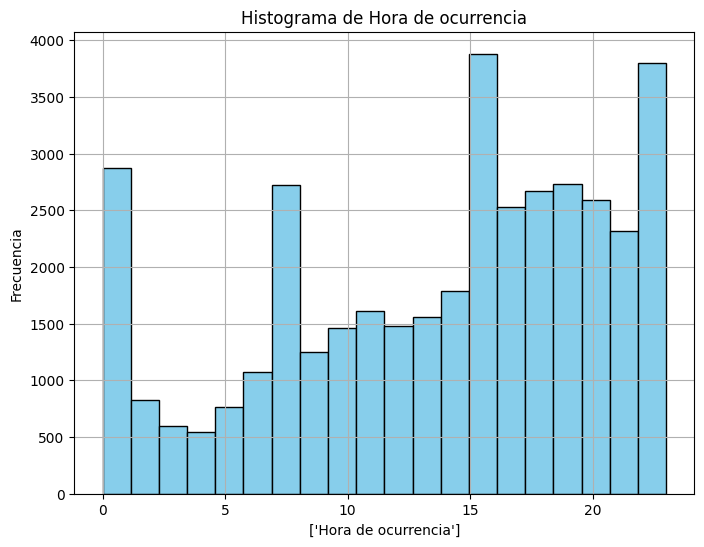

In [83]:

plt.figure(figsize=(8, 6))
plt.hist(data["hora_ocu"], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de {"Hora de ocurrencia"}')
plt.xlabel(['Hora de ocurrencia'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

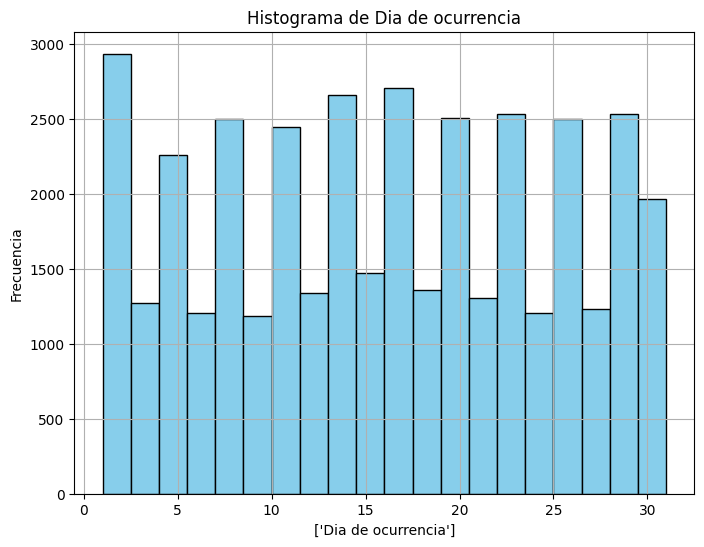

In [84]:

plt.figure(figsize=(8, 6))
plt.hist(data["dia_ocu"], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de {"Dia de ocurrencia"}')
plt.xlabel(['Dia de ocurrencia'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

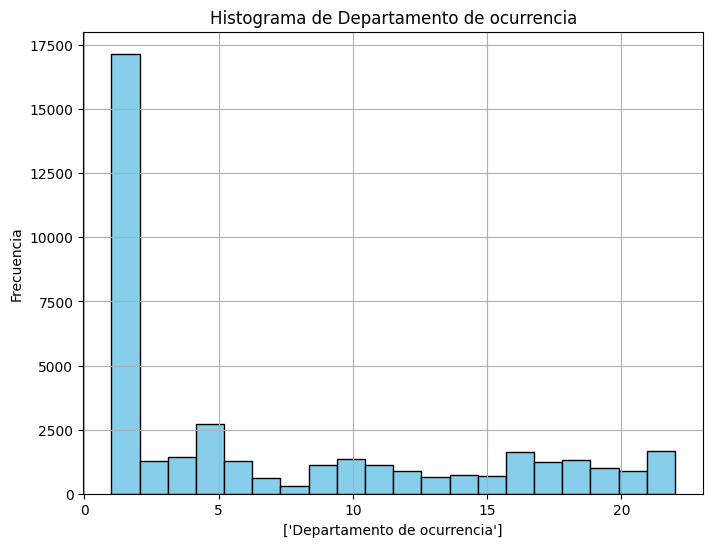

In [85]:
plt.figure(figsize=(8, 6))
plt.hist(data["depto_ocu"], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de {"Departamento de ocurrencia"}')
plt.xlabel(['Departamento de ocurrencia'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

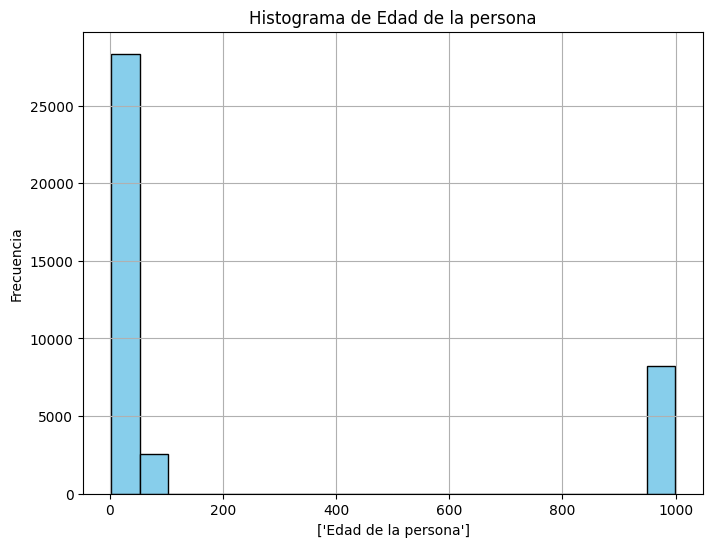

In [86]:
plt.figure(figsize=(8, 6))
plt.hist(data["edad_per"], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de {"Edad de la persona"}')
plt.xlabel(['Edad de la persona'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

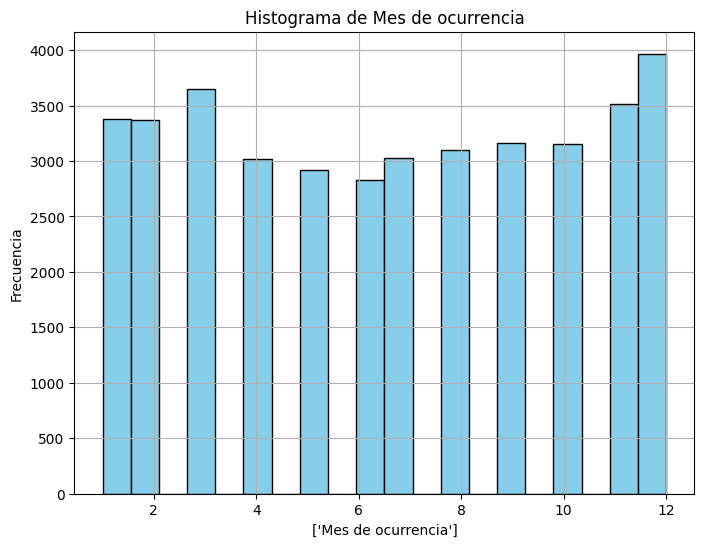

In [87]:

plt.figure(figsize=(8, 6))
plt.hist(data["mes_ocu"], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de {"Mes de ocurrencia"}')
plt.xlabel(['Mes de ocurrencia'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

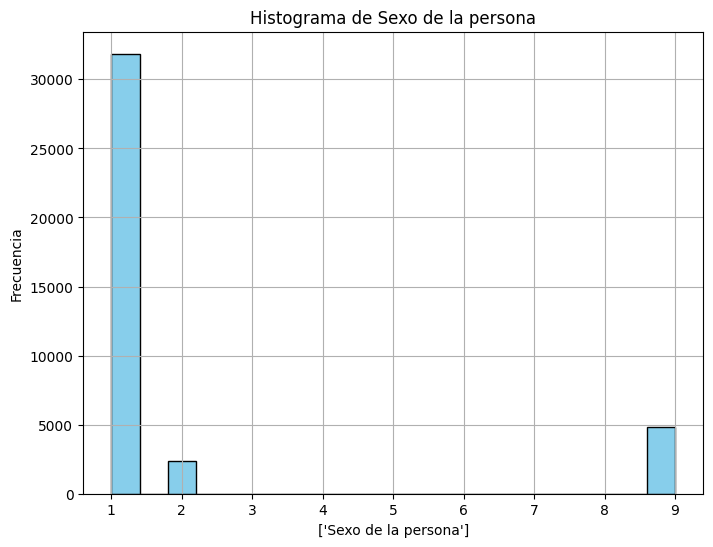

In [88]:
plt.figure(figsize=(8, 6))
plt.hist(data["sexo_per"], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de {"Sexo de la persona"}')
plt.xlabel(['Sexo de la persona'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

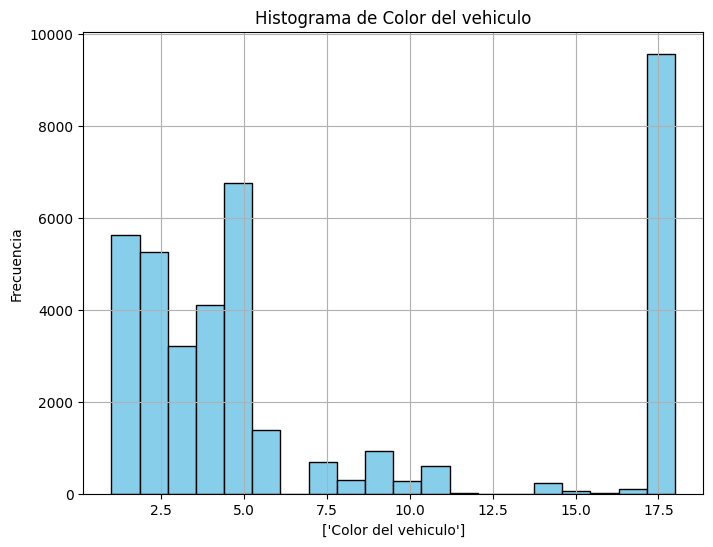

In [89]:
plt.figure(figsize=(8, 6))
plt.hist(data["color_veh"], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de {"Color del vehiculo"}')
plt.xlabel(['Color del vehiculo'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

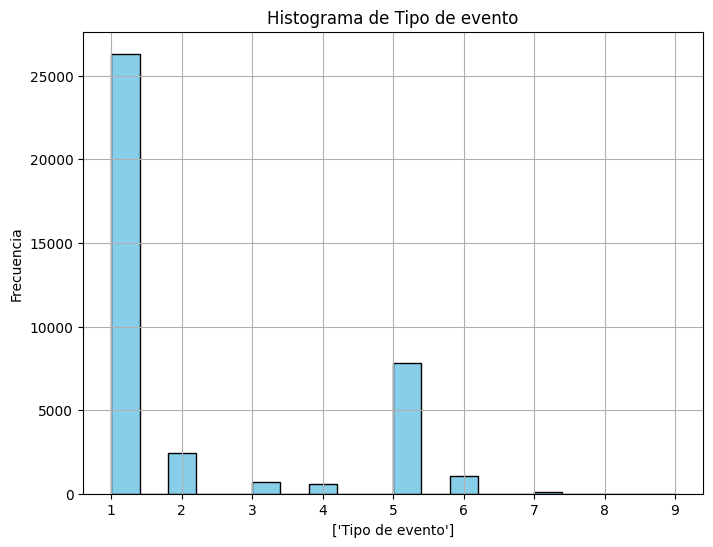

In [90]:
plt.figure(figsize=(8, 6))
plt.hist(data["tipo_eve"], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de {"Tipo de evento"}')
plt.xlabel(['Tipo de evento'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

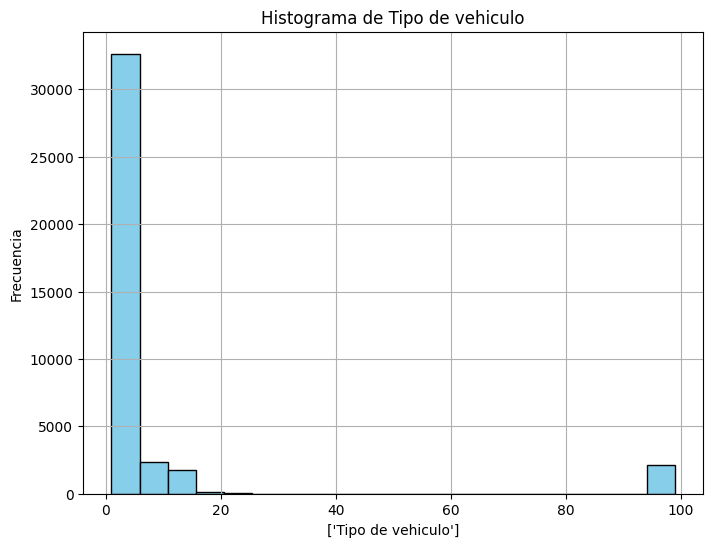

In [91]:
plt.figure(figsize=(8, 6))
plt.hist(data["tipo_veh"], bins=20, color='skyblue', edgecolor='black')
plt.title(f'Histograma de {"Tipo de vehiculo"}')
plt.xlabel(['Tipo de vehiculo'])
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

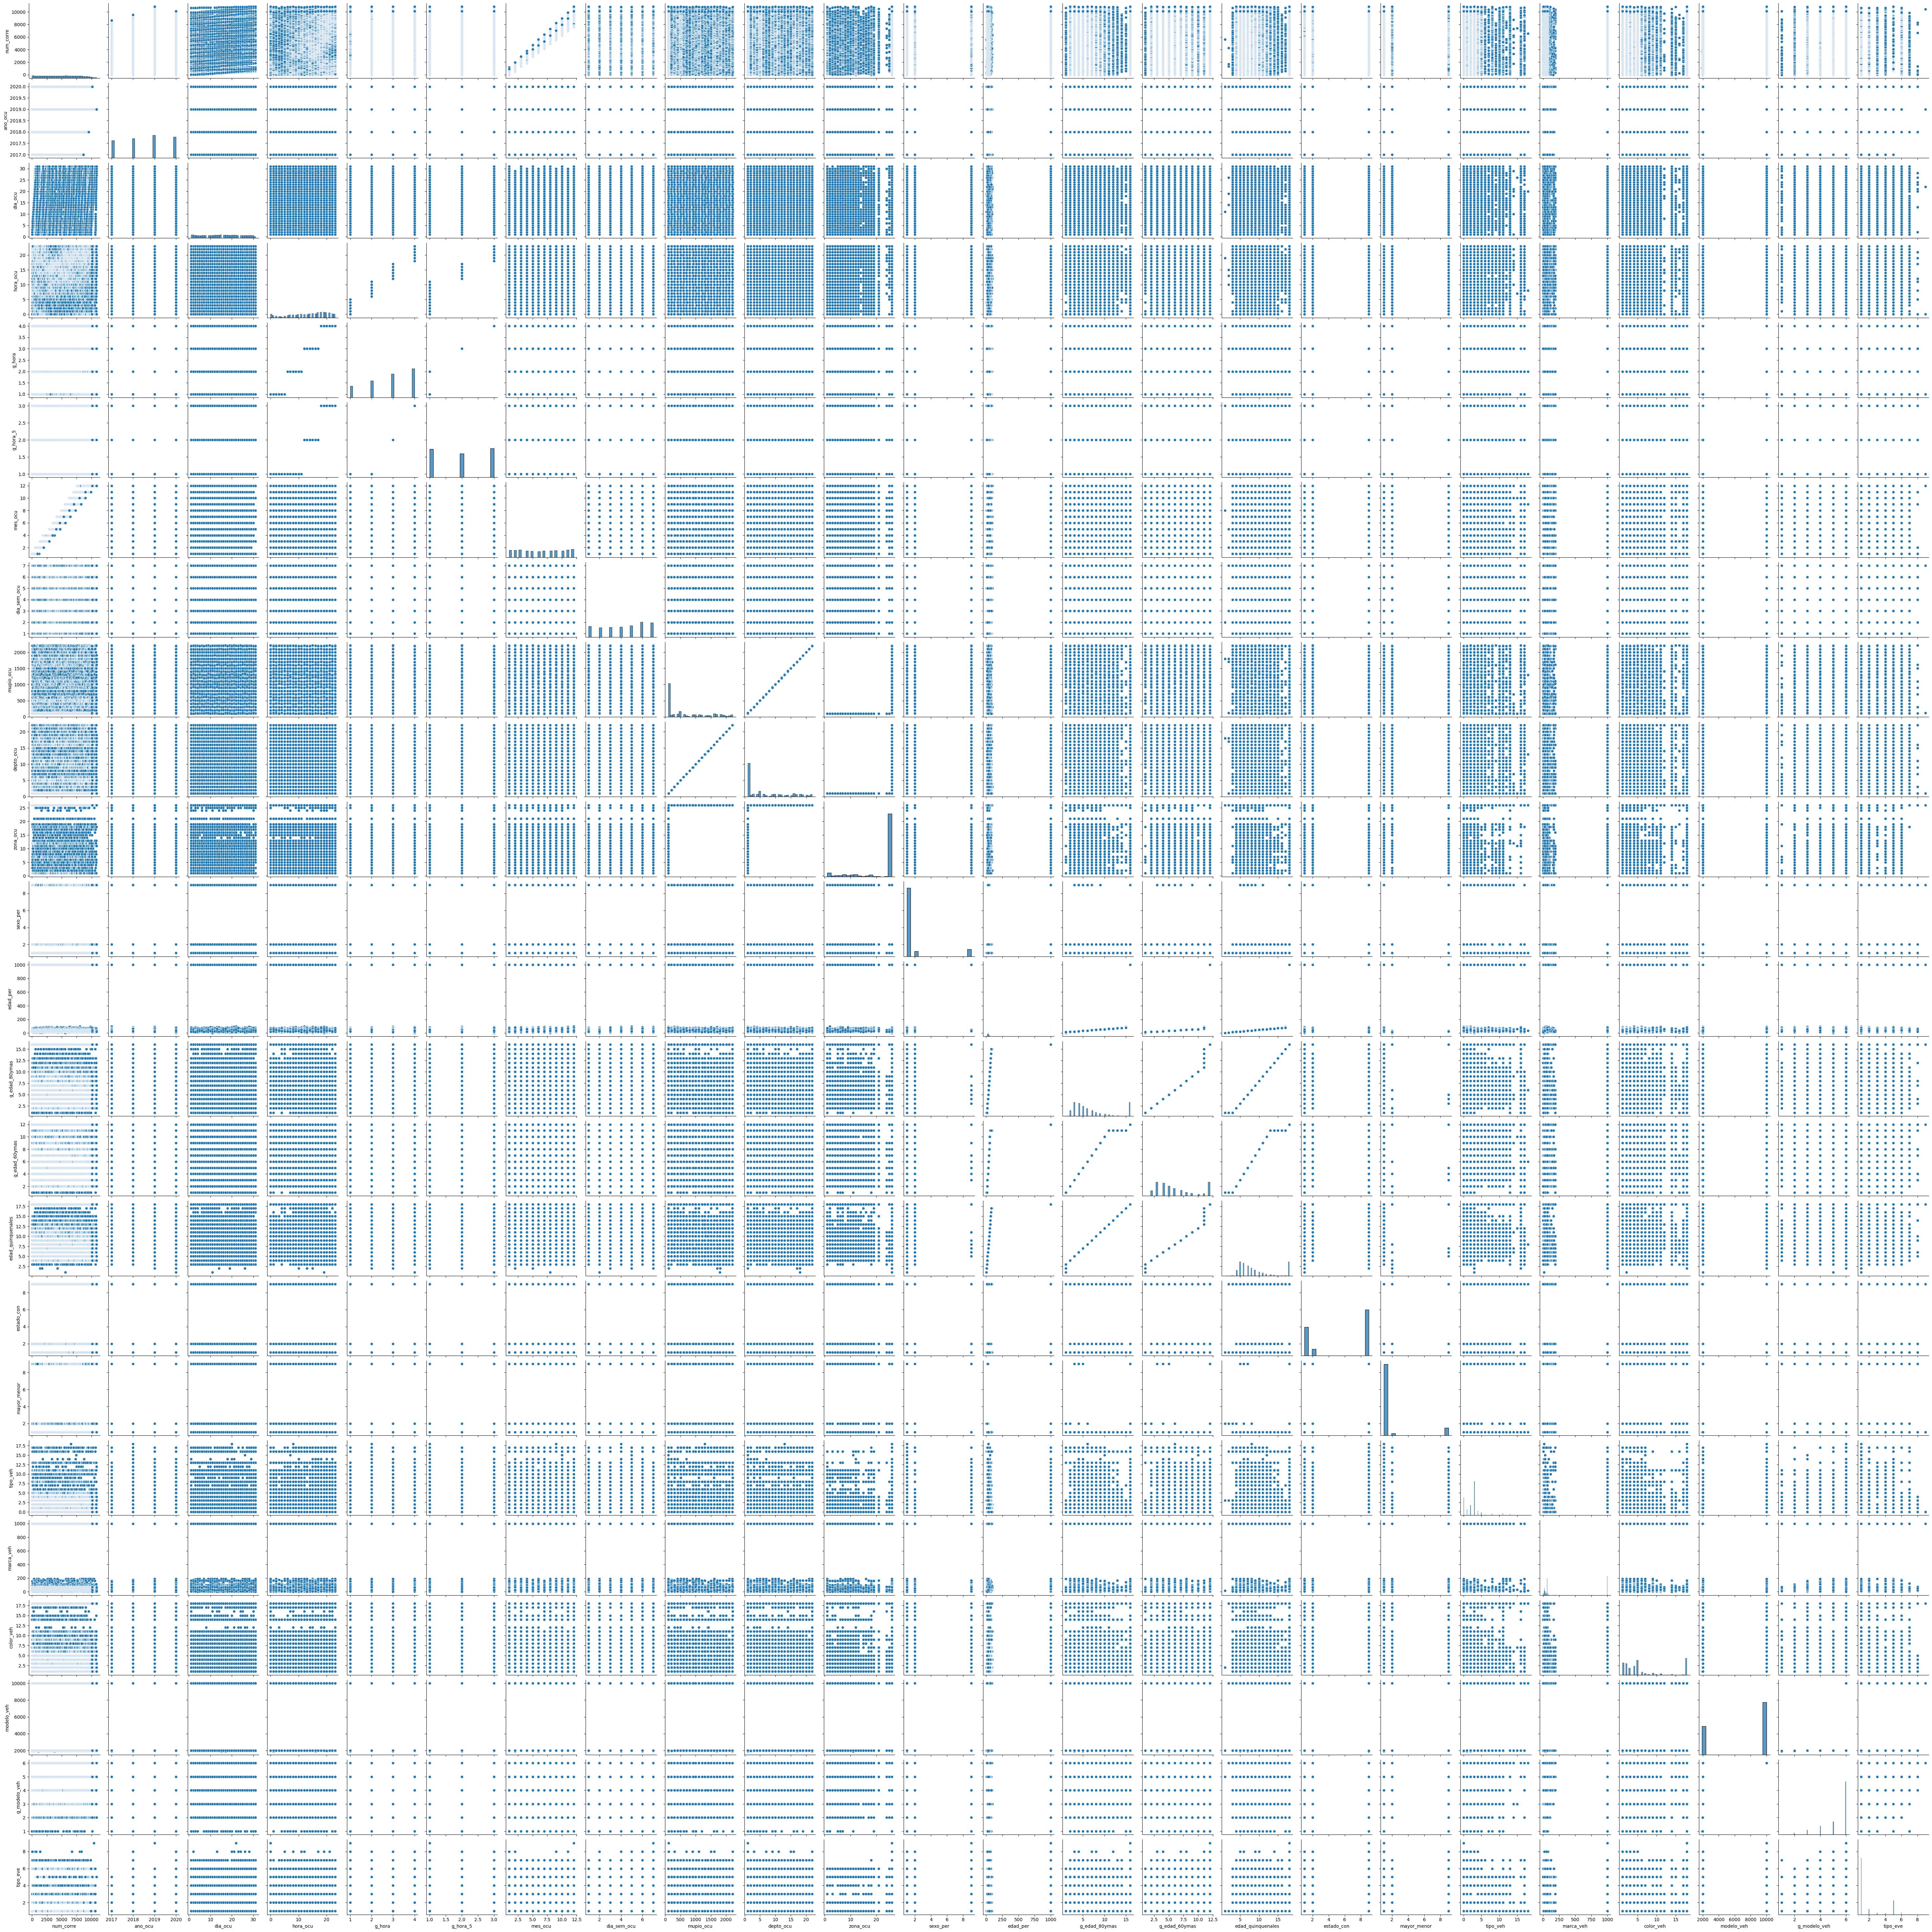

In [182]:
sns.pairplot(data)

### Limpiar la data


In [237]:
# data = data[data['hora_ocu'] != 99]
# data = data[data['zona_ocu'] != 99]
# data = data[data['tipo_veh'] != 99]
# data = data[data['marca_veh'] != 99]
# data = data[data['color_veh'] != 99]
# data = data[data['modelo_veh'] != 9999]
# data = data[data['g_modelo_veh'] != 99]
# data = data[data['tipo_eve'] != 99]
data = data[data['tipo_veh'] != 99]



In [238]:
data.shape

(36950, 24)

In [240]:
## Unique de la columa tipo_veh
unique_classes = data['tipo_veh'].unique()
print("Clases únicas en la columna 'tipo_veh':")
unique_classes.sort()
print(unique_classes)

Clases únicas en la columna 'tipo_veh':
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 22 23]


### Resamplear los datos

In [241]:
df_resampled, _ = RandomOverSampler(sampling_strategy='auto').fit_resample(data, data['tipo_veh'])

In [242]:
## Unique de la columa tipo_veh
unique_classes = df_resampled['tipo_veh'].unique()
print("Clases únicas en la columna 'tipo_veh':")
unique_classes.sort()
print(unique_classes)

Clases únicas en la columna 'tipo_veh':
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 22 23]


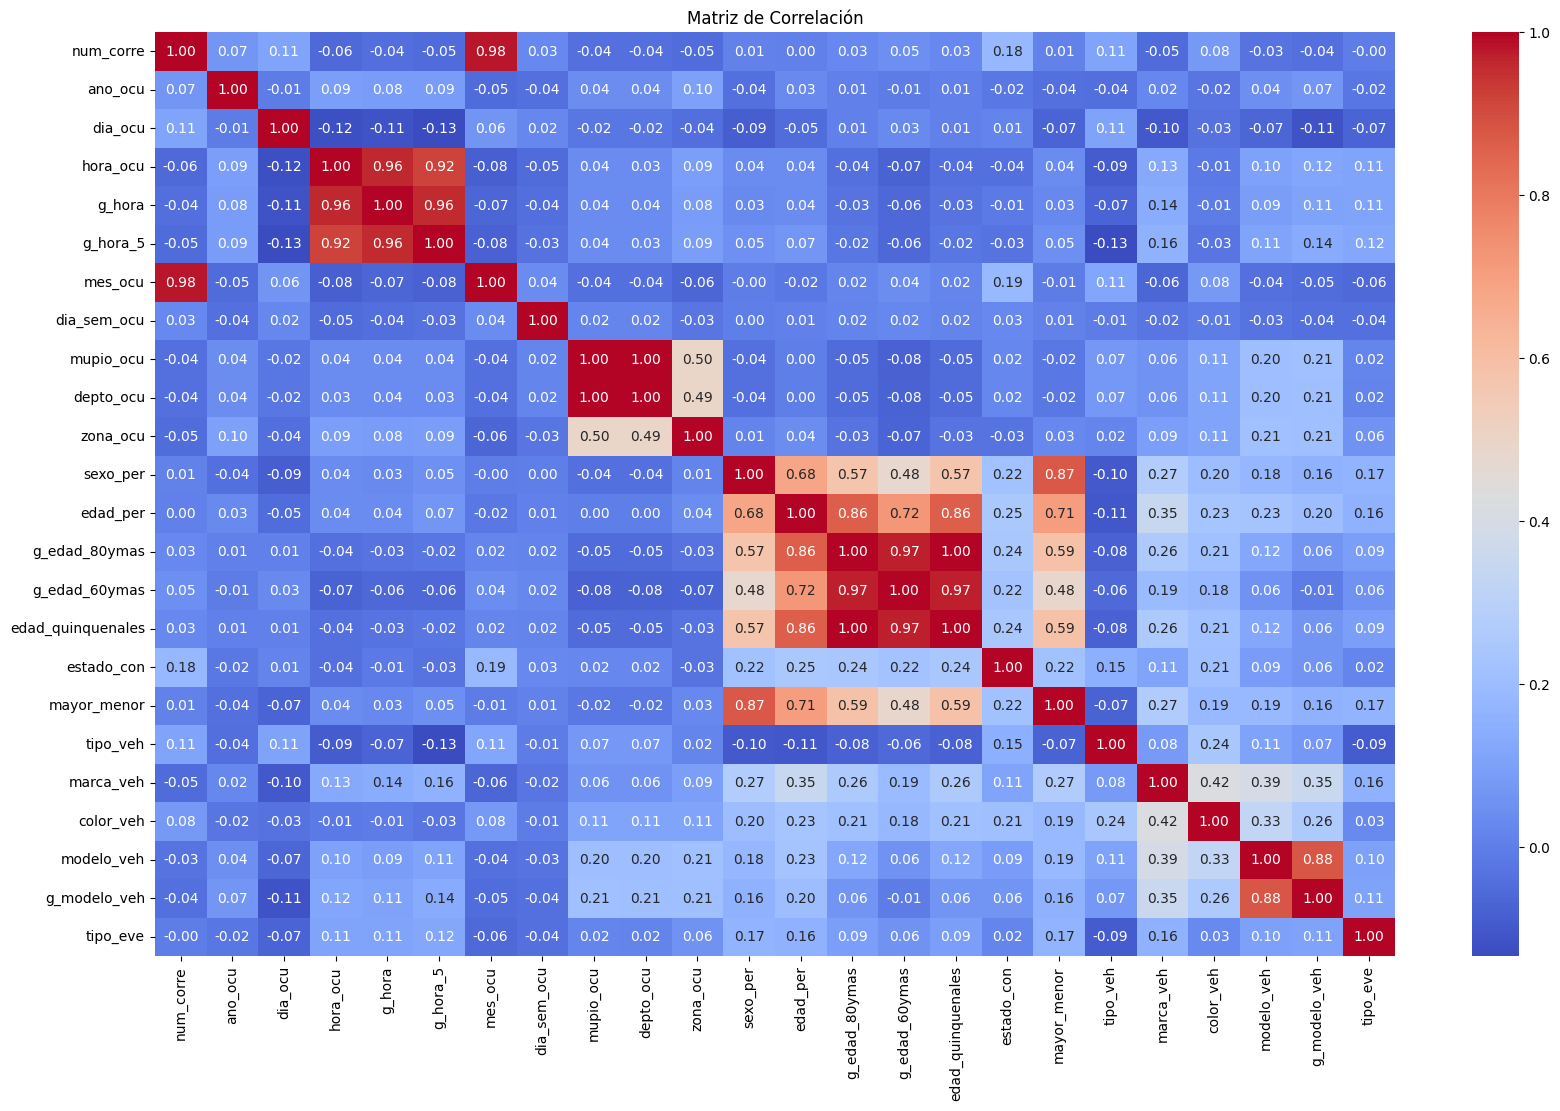

In [243]:
correlation_matrix = df_resampled.corr()

# Configuración de la visualización con Seaborn
plt.figure(figsize=(20, 12))  # Establece el tamaño del gráfico
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Crea el mapa de calor con anotaciones y colores

# Configuración adicional (opcional)
plt.title('Matriz de Correlación')
plt.show()

In [244]:
label_encoder = LabelEncoder()
df_resampled['tipo_veh'] = label_encoder.fit_transform(df_resampled['tipo_veh'])

In [207]:
features = df_resampled[['estado_con', 'mes_ocu', 'hora_ocu', 'dia_ocu','sexo_per']]
target = df_resampled['tipo_veh']

In [208]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [209]:
model = Sequential()
model.add(Dense(256, input_dim=features.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(19, activation='softmax'))  # Capa de salida con activación softmax para clasificación multiclase

In [210]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 256)               1536      
                                                                 
 dense_71 (Dense)            (None, 128)               32896     
                                                                 
 dense_72 (Dense)            (None, 64)                8256      
                                                                 
 dense_73 (Dense)            (None, 32)                2080      
                                                                 
 dense_74 (Dense)            (None, 19)                627       
                                                                 
Total params: 45,395
Trainable params: 45,395
Non-trainable params: 0
_________________________________________________________________


In [211]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [212]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
7341/7341 [==============================] - 11s 1ms/step - loss: 2.1609 - accuracy: 0.3168 - val_loss: 1.9148 - val_accuracy: 0.3831
Epoch 2/20
7341/7341 [==============================] - 10s 1ms/step - loss: 1.7978 - accuracy: 0.4267 - val_loss: 1.6747 - val_accuracy: 0.4691
Epoch 3/20
7341/7341 [==============================] - 10s 1ms/step - loss: 1.6528 - accuracy: 0.4710 - val_loss: 1.5948 - val_accuracy: 0.4853
Epoch 4/20
7341/7341 [==============================] - 9s 1ms/step - loss: 1.5710 - accuracy: 0.4937 - val_loss: 1.5156 - val_accuracy: 0.5090
Epoch 5/20
7341/7341 [==============================] - 9s 1ms/step - loss: 1.5127 - accuracy: 0.5106 - val_loss: 1.4601 - val_accuracy: 0.5255
Epoch 6/20
7341/7341 [==============================] - 10s 1ms/step - loss: 1.4672 - accuracy: 0.5235 - val_loss: 1.4540 - val_accuracy: 0.5356
Epoch 7/20
7341/7341 [==============================] - 10s 1ms/step - loss: 1.4291 - accuracy: 0.5347 - val_loss: 1.4127 - val_accu

Text(0, 0.5, 'Training Error')

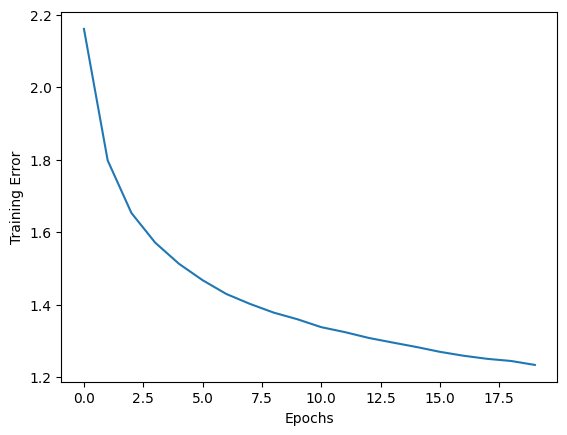

In [213]:
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [214]:
X_test

estado_con  mes_ocu  hora_ocu  dia_ocu  sexo_per
2045             1        4         1       13         2
183430           9       12         8       20         1
8871             9        2        19        5         2
238797           9       10         7       26         1
247713           1       10         1       12         1
...            ...      ...       ...      ...       ...
248701           9        7        12       14         1
119032           2       12        14       12         1
288931           9        9         8       20         1
235527           9       10         7       26         1
166928           2       11        18       24         1

[58726 rows x 5 columns]

In [215]:
y_test

2045       3
183430    11
8871       2
238797    15
247713    16
          ..
248701    16
119032     7
288931    18
235527    15
166928    10
Name: tipo_veh, Length: 58726, dtype: int64

In [216]:
columnas = ['estado_con', 'mes_ocu', 'hora_ocu', 'dia_ocu','sexo_per']
datos =  [[9,12,8,20,1]]
datos2 = [[]]
prueba = pd.DataFrame(datos, columns=columnas)
predictions = model.predict(prueba)
predicted_classes = predictions.argmax(axis=-1)
print(predicted_classes)
predicted_classes = label_encoder.inverse_transform(predicted_classes)
predicted_classes.tolist()
prediccion = predicted_classes[0]
print(prediccion)


1/1 [==============================] - 0s 61ms/step
[11]
11


In [217]:
_, accuracy = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1836/1836 [==============================] - 1s 776us/step - loss: 1.2507 - accuracy: 0.5923
Precisión en el conjunto de prueba: 59.23%


In [218]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

1836/1836 [==============================] - 1s 702us/step


In [220]:
y_pred_classes

array([ 1, 11,  0, ..., 18, 15, 13], dtype=int64)

In [221]:
decoded_classes = label_encoder.inverse_transform(y_pred_classes)

In [259]:
y_test_original = label_encoder.inverse_transform(y_test)
y_pred_classes_original = label_encoder.inverse_transform(y_pred_classes)

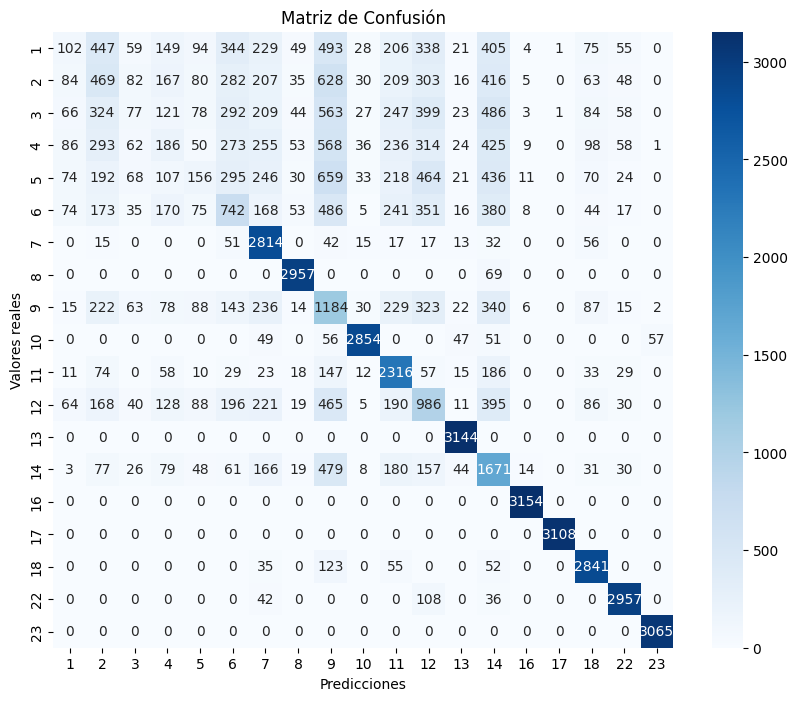

In [260]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_original), yticklabels=np.unique(y_test_original))
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [261]:
import joblib

In [262]:
model.save('./modelos/modelo1.0.h5')
joblib.dump(label_encoder, './modelos/label_encoder.pkl')

['./modelos/label_encoder.pkl']

### Segundo Modelo

In [335]:
features = df_resampled[['estado_con', 'mes_ocu', 'hora_ocu', 'dia_ocu','tipo_eve']]
target = df_resampled['tipo_veh']

In [336]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [337]:
model2 = Sequential()
model2.add(Dense(256, input_dim=features.shape[1], activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(20, activation='softmax'))  # Capa de salida con activación softmax para clasificación multiclase

In [338]:
model2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 256)               1536      
                                                                 
 dense_117 (Dense)           (None, 128)               32896     
                                                                 
 dense_118 (Dense)           (None, 64)                8256      
                                                                 
 dense_119 (Dense)           (None, 32)                2080      
                                                                 
 dense_120 (Dense)           (None, 20)                660       
                                                                 
Total params: 45,428
Trainable params: 45,428
Non-trainable params: 0
_________________________________________________________________


In [339]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [340]:
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
7341/7341 [==============================] - 11s 1ms/step - loss: 2.1022 - accuracy: 0.3388 - val_loss: 1.8231 - val_accuracy: 0.4190
Epoch 2/20
7341/7341 [==============================] - 9s 1ms/step - loss: 1.7304 - accuracy: 0.4471 - val_loss: 1.6669 - val_accuracy: 0.4765
Epoch 3/20
7341/7341 [==============================] - 9s 1ms/step - loss: 1.5976 - accuracy: 0.4856 - val_loss: 1.5499 - val_accuracy: 0.4923
Epoch 4/20
7341/7341 [==============================] - 9s 1ms/step - loss: 1.5241 - accuracy: 0.5067 - val_loss: 1.4762 - val_accuracy: 0.5215
Epoch 5/20
7341/7341 [==============================] - 9s 1ms/step - loss: 1.4686 - accuracy: 0.5225 - val_loss: 1.4519 - val_accuracy: 0.5231
Epoch 6/20
7341/7341 [==============================] - 9s 1ms/step - loss: 1.4265 - accuracy: 0.5342 - val_loss: 1.3843 - val_accuracy: 0.5470
Epoch 7/20
7341/7341 [==============================] - 9s 1ms/step - loss: 1.3915 - accuracy: 0.5441 - val_loss: 1.3824 - val_accuracy

Text(0, 0.5, 'Training Error')

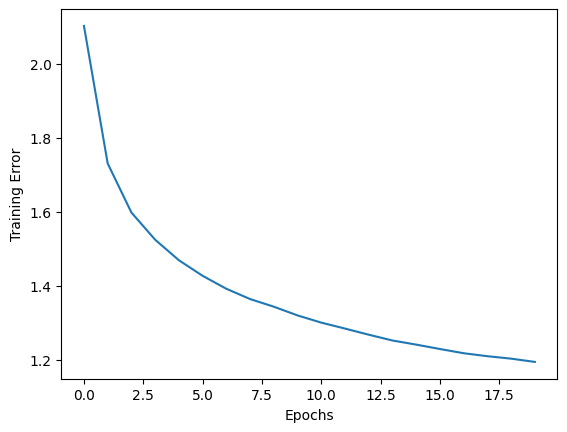

In [341]:
plt.plot(history2.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [342]:
_, accuracy = model2.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1836/1836 [==============================] - 1s 748us/step - loss: 1.1912 - accuracy: 0.5993
Precisión en el conjunto de prueba: 59.93%


In [343]:
y_pred2 = model2.predict(X_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)

1836/1836 [==============================] - 1s 671us/step


In [280]:
decoded_classes2 = label_encoder.inverse_transform(y_pred_classes2)

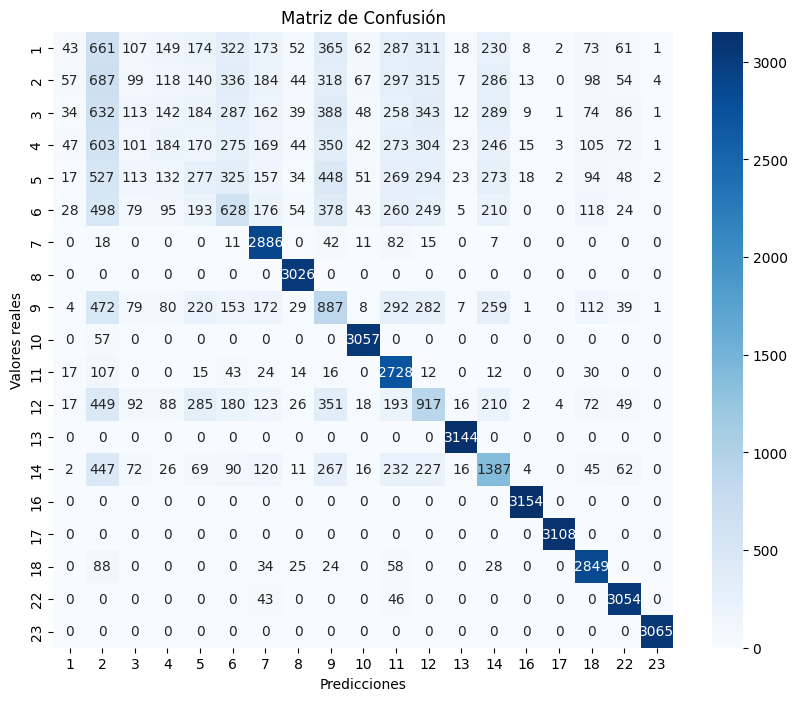

In [344]:
conf_matrix = confusion_matrix(y_test, y_pred_classes2)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_original), yticklabels=np.unique(y_test_original))
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

### Guardar modelo

In [283]:
model.save('./modelos/modelo2.0.h5')

#### Modelo 3

In [324]:
features = df_resampled[['estado_con', 'mes_ocu', 'hora_ocu', 'dia_ocu','tipo_eve']]
target = df_resampled['tipo_veh']

In [325]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [326]:
model3 = Sequential()
model3.add(Dense(512, input_dim=features.shape[1], activation='relu'))
model3.add(Dense(256,activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(20, activation='softmax'))  # Capa de salida con activación softmax para clasificación multiclase

In [327]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [329]:
history3 = model3.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


7341/7341 [==============================] - 17s 2ms/step - loss: 1.8872 - accuracy: 0.4008 - val_loss: 1.6110 - val_accuracy: 0.4905
Epoch 2/20
7341/7341 [==============================] - 16s 2ms/step - loss: 1.5563 - accuracy: 0.4995 - val_loss: 1.4507 - val_accuracy: 0.5297
Epoch 3/20
7341/7341 [==============================] - 16s 2ms/step - loss: 1.4310 - accuracy: 0.5351 - val_loss: 1.3747 - val_accuracy: 0.5524
Epoch 4/20
7341/7341 [==============================] - 16s 2ms/step - loss: 1.3518 - accuracy: 0.5590 - val_loss: 1.3086 - val_accuracy: 0.5688
Epoch 5/20
7341/7341 [==============================] - 16s 2ms/step - loss: 1.2932 - accuracy: 0.5767 - val_loss: 1.2534 - val_accuracy: 0.5875
Epoch 6/20
7341/7341 [==============================] - 16s 2ms/step - loss: 1.2496 - accuracy: 0.5894 - val_loss: 1.2893 - val_accuracy: 0.5853
Epoch 7/20
7341/7341 [==============================] - 16s 2ms/step - loss: 1.2167 - accuracy: 0.6002 - val_loss: 1.2005 - val_accuracy: 0.6

Text(0, 0.5, 'Training Error')

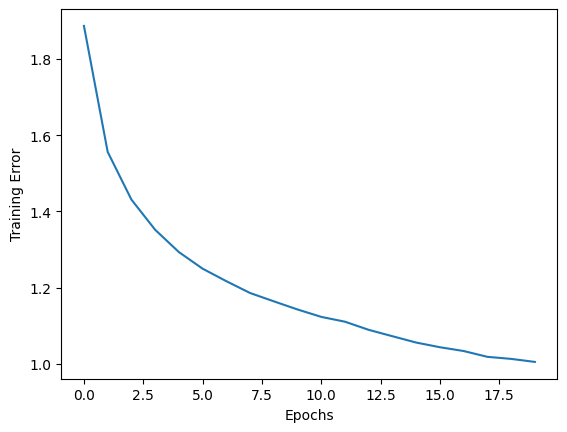

In [330]:
plt.plot(history3.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Error")

In [331]:
_, accuracy = model3.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1836/1836 [==============================] - 2s 1ms/step - loss: 1.0343 - accuracy: 0.6612
Precisión en el conjunto de prueba: 66.12%


In [333]:
y_pred3 = model3.predict(X_test)
y_pred_classes3 = np.argmax(y_pred3, axis=1)

1836/1836 [==============================] - 2s 934us/step


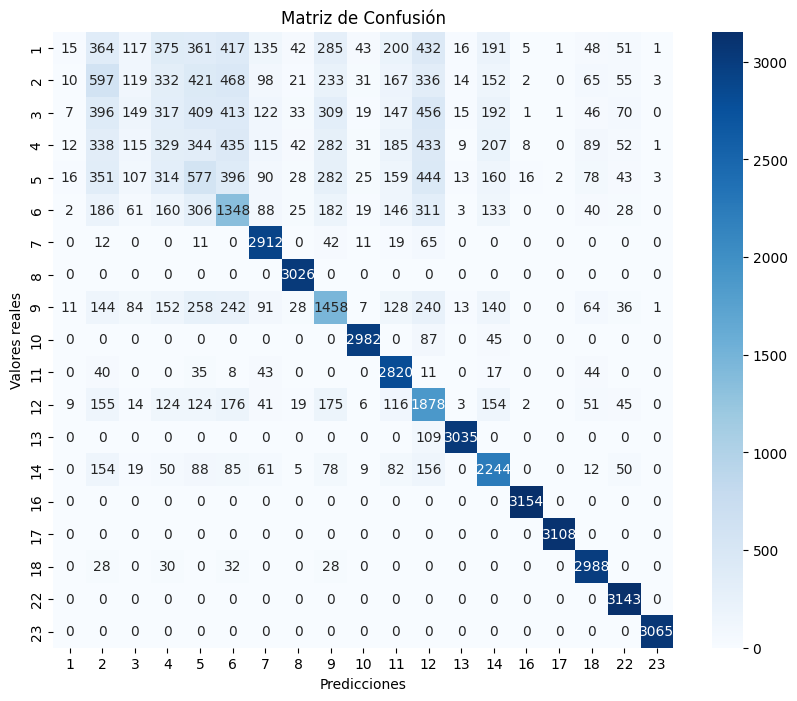

In [334]:
conf_matrix = confusion_matrix(y_test, y_pred_classes3)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_original), yticklabels=np.unique(y_test_original))
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [308]:
model3.save('./modelos/modelo3.0.h5')

### Modelo 4

In [313]:
features = df_resampled[['estado_con', 'mes_ocu', 'hora_ocu', 'dia_ocu','tipo_eve','depto_ocu']]
target = df_resampled['tipo_veh']

In [314]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [315]:
model4 = Sequential()
model4.add(Dense(1024, input_dim=features.shape[1], activation='relu'))
model4.add(Dense(512, activation='relu'))
model4.add(Dense(256,activation='relu'))
model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(20, activation='softmax'))  # Capa de salida con activación softmax para clasificación multiclase

In [316]:
model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [318]:
history4 = model4.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
7341/7341 [==============================] - 48s 7ms/step - loss: 1.5665 - accuracy: 0.4981 - val_loss: 1.3712 - val_accuracy: 0.5558
Epoch 2/20
7341/7341 [==============================] - 47s 6ms/step - loss: 1.2592 - accuracy: 0.5871 - val_loss: 1.1760 - val_accuracy: 0.6077
Epoch 3/20
7341/7341 [==============================] - 47s 6ms/step - loss: 1.1299 - accuracy: 0.6272 - val_loss: 1.0666 - val_accuracy: 0.6473
Epoch 4/20
7341/7341 [==============================] - 47s 6ms/step - loss: 1.0426 - accuracy: 0.6533 - val_loss: 1.0016 - val_accuracy: 0.6661
Epoch 5/20
7341/7341 [==============================] - 46s 6ms/step - loss: 0.9808 - accuracy: 0.6731 - val_loss: 0.9696 - val_accuracy: 0.6775
Epoch 6/20
7341/7341 [==============================] - 47s 6ms/step - loss: 0.9315 - accuracy: 0.6888 - val_loss: 0.9115 - val_accuracy: 0.6920
Epoch 7/20
7341/7341 [==============================] - 47s 6ms/step - loss: 0.8939 - accuracy: 0.7006 - val_loss: 0.8893 - val_ac

In [319]:
_, accuracy = model4.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {accuracy * 100:.2f}%')

1836/1836 [==============================] - 3s 2ms/step - loss: 0.7174 - accuracy: 0.7644
Precisión en el conjunto de prueba: 76.44%


In [320]:
y_pred4 = model4.predict(X_test)
y_pred_classes4 = np.argmax(y_pred4, axis=1)

1836/1836 [==============================] - 3s 1ms/step


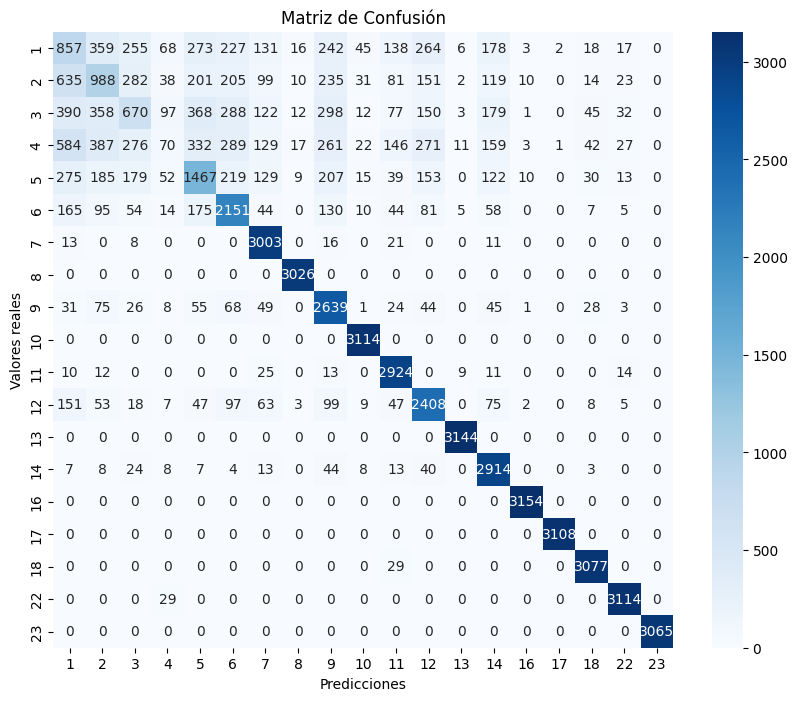

In [321]:
conf_matrix = confusion_matrix(y_test, y_pred_classes4)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_original), yticklabels=np.unique(y_test_original))
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [332]:
model4.save('./modelos/modelo4.0.h5')